# Linear Regression

In [1]:
import pandas as pd
import random 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)
pd.set_option('display.width', 1000)

### one way of creating a data set 

In [ ]:
data = []
for _ in range(500):
    team_name = f'Team {chr(random.randint(65, 90))}'
    season = random.randint(2010, 2023)
    wins = random.randint(50, 110)
    losses = 162 - wins
    hits = random.randint(1200, 1600)
    doubles = random.randint(200, 350)
    triples = random.randint(10, 40)
    home_runs = random.randint(100, 250)
    strikeouts = random.randint(1000, 1500)

    hist_adjusted = hits + (wins-80) * 5
    doubles_adjusted = doubles + (wins-80) * 2
    triples_adjusted = triples + (wins-80)
    home_runs_adjusted = home_runs + (wins - 80) * 3
    strikeouts_adjusted = strikeouts - (wins-80) * 10

    data.append([team_name, season, wins, losses, hits, doubles, triples, home_runs, strikeouts, hist_adjusted, doubles_adjusted, triples_adjusted,
                home_runs_adjusted, strikeouts_adjusted])

df = pd.DataFrame(data, columns=['Team', 'Season', 'Wins', 'Losses', 'Hits', 'Doubles', 'Triples', 'Home_runs', 'Strikeouts', 
                                 'hist_adjusted', 'doubles_adjusted', 'triples_adjusted', 'home_runs_adjusted', 'strikeouts_adjusted'])
df

In [2]:
df = pd.read_csv(r'C:\Users\jayavaradhan.olivu\OneDrive - DISYS\Documents\Data Science\Data Science - Python\Python Practice\Data source\train - EDA.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Seeing the position before the prediction

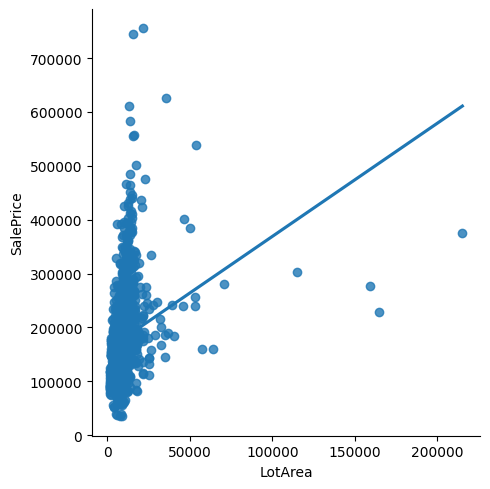

In [3]:
sns.lmplot(x = 'LotArea', y = 'SalePrice', data = df, ci = None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


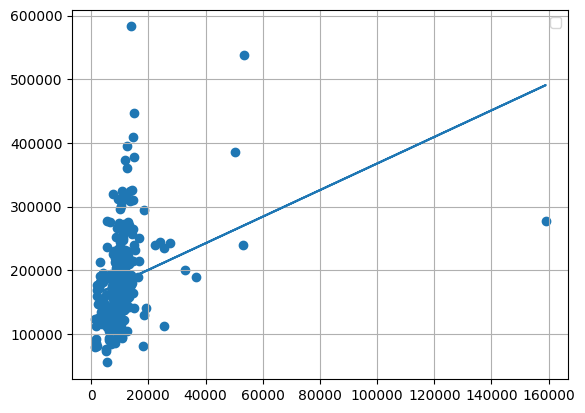

In [5]:
x = df[['LotArea']]
y = df[['SalePrice']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)
plt.legend()
plt.grid(True)
plt.show()

### Little comparison between predicted and actual

In [6]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df
df_new = pd.DataFrame(x_test)
df_new['Actual'] = y_test.values
df_new['Predicted'] = y_pred_df.values
df_new

,LotArea,Actual,Predicted
1457,9042,266500,177668.422990
743,12886,175000,185696.083056
3,9550,140000,178729.310428
1129,7200,140000,173821.661845
866,10656,248900,181039.037804
326,10846,324000,181435.826413
1245,12090,178000,184033.747621
1304,3363,130000,165808.620306
1456,13175,210000,186299.619414
201,10125,171500,179930.118060


## Metric check

In [9]:
mean_squar_error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
round(r2,2)
round(mean_squar_error,2)

4580599417.07

In [10]:

data = {
    'Temperature': [60, 70, 80, 90, 100],
    'Fuel_Price': [3.5, 3.7, 3.6, 3.8, 4.0],
    'CFI': [220, 221, 222, 223, 224],
    'Unemployment': [5.0, 5.2, 5.1, 5.3, 5.4],
    'Weekly_Sales': [20000, 21000, 22000, 23000, 24000]
}

df = pd.DataFrame(data)

x, y = df[['Temperature', 'Fuel_Price', 'CFI', 'Unemployment']], df['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_prediction = model.predict(x_test)

mean_squared_error_check = mean_squared_error(y_test, y_prediction)

df_new = pd.DataFrame(x_test)

df_new['Actual'] = y_test.values
df_new['Predicted'] = y_prediction
df_new['Squared_Error'] = (df_new['Actual'] - df_new['Predicted']) * 2
df_new['Error'] = df_new['Actual'] - df_new['Predicted']
df_new['MSA'] = mean_squared_error_check
print('\n')
print(mean_squared_error_check)
print('\n')
print(df_new)
print('\n')
print(df)




0.0


   Temperature  Fuel_Price  CFI  Unemployment  Actual  Predicted  Squared_Error  Error  MSA
1           70         3.7  221           5.2   21000    21000.0            0.0    0.0  0.0


   Temperature  Fuel_Price  CFI  Unemployment  Weekly_Sales
0           60         3.5  220           5.0         20000
1           70         3.7  221           5.2         21000
2           80         3.6  222           5.1         22000
3           90         3.8  223           5.3         23000
4          100         4.0  224           5.4         24000


### practicing

In [11]:
pd.set_option('display.float_format', lambda x: "%.3f" % x)
df1 = pd.read_csv(r'C:\Users\jayavaradhan.olivu\OneDrive - DISYS\Documents\Data Science\Data Science - Python\Python - '
                 r'Data Source\Walmart_sales.csv')
df1['Date'] = pd.to_datetime(df1['Date'], format='mixed')

df1['Weekly_Sales'] = df1['Weekly_Sales'].replace(r'[\$,'']','', regex=True).astype(float) ## replacing )the space as well the $

x, y = df1[['Temperature', 'Fuel_Price', 'CPI']], df1['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model = LinearRegression()
Model.fit(x_train, y_train)

y_prediction = Model.predict(x_test)

r2 = r2_score(y_test, y_prediction)

df2 = pd.DataFrame(data=x_test)

df2['Actual'] = y_test.values
df2['Predicted'] = y_prediction
df2['Difference'] = df2['Actual'] - df2['Predicted']
df2['R2'] = round(r2,2)
df2

,Temperature,Fuel_Price,CPI,Actual,Predicted,Difference,R2
2436,42.390,2.805,131.784,1138800.320,1108815.560,29984.760,0.010
3361,68.880,3.964,135.265,1304850.670,1064211.314,240639.356,0.010
233,65.870,3.372,217.325,1769296.250,995480.288,773815.962,0.010
3667,40.080,3.570,136.462,1077640.130,1107090.207,-29450.077,0.010
5011,59.560,2.701,209.980,428851.990,1012494.787,-583642.797,0.010
4850,78.260,3.476,130.756,1004523.590,1054760.015,-50236.425,0.010
3891,83.120,3.087,126.102,1523410.710,1052130.591,471280.119,0.010
1699,89.130,3.765,130.720,1014898.780,1038020.190,-23121.410,0.010
2742,76.030,2.781,204.605,1955896.590,992393.659,963502.931,0.010
1703,88.160,3.760,130.738,958667.230,1039473.581,-80806.351,0.010
